In [187]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from mnist import MNIST

In [71]:
%load_ext autoreload 
%matplotlib inline
%autoreload 2
from utilities import *

# Default figure size
plt.rcParams['figure.figsize'] = (10,7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PATH = './data/fashion/'
data = MNIST(PATH)
data.gz = True
images,labels = data.load_training()

In [7]:
X = np.array(images).T
Y = np.array(labels)

In [11]:
classes = np.unique(Y); classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [52]:
description = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',
               4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',
               8:'Bag',9:'Ankle boot'}
description

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [21]:
pos = []
for val in classes:
    pos.append(np.where(Y == val)[0][0])

In [37]:
X.shape

(784, 60000)

In [138]:
def plot_data(X,Y,description,num = 30,pos = None):
    
    if pos is None:
        pos = np.random.choice(Y.size,num,replace=False)
        width = 6
        height = math.ceil(num/width)
        fig = plt.figure(figsize=(width*1.5,height*1.5))
        for i in range(num):
            fig.add_subplot(height,width,i+1)
            img = X[:,pos[i]].reshape(28,28)
            plt.imshow(img,cmap='gray')
            plt.title(description[Y[pos[i]]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        
    else:
        width = math.ceil(len(pos)/2)
        height = math.ceil(len(pos)/width)
        fig = plt.figure(figsize=(width*1.5,height*1.5))
        for i,val in enumerate(pos):
            fig.add_subplot(height,width,i+1)
            img = X[:,val].reshape(28,28)
            plt.imshow(img,cmap='gray')
            plt.title(description[Y[val]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        

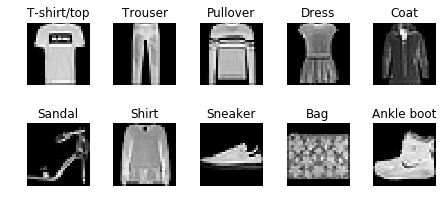

In [149]:
plot_data(X,Y,description,pos = pos)

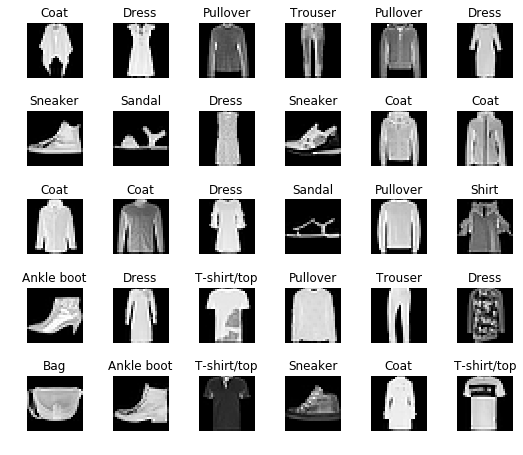

In [150]:
plot_data(X,Y,description)

In [306]:
def horizontal_flip(X):
    
    flip_X = X.T.reshape(-1,28,28)
    flip_X = flip_X[:,:,::-1]
    flip_X = flip_X.reshape(-1,28*28)
    return flip_X.T

In [307]:
flip_X = horizontal_flip(X)

In [308]:
flip_X.shape

(784, 60000)

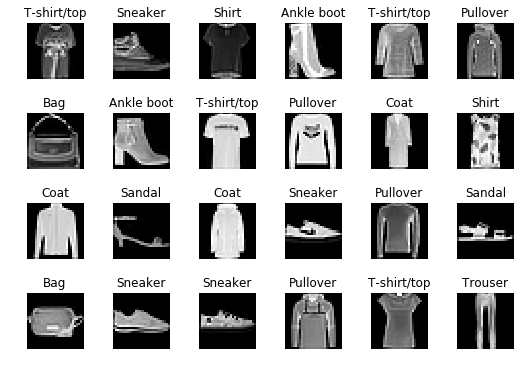

In [317]:
plot_data(flip_X,Y,description,num=24)

In [309]:
new_X = np.c_[X,flip_X]

In [310]:
new_X.shape

(784, 120000)

In [313]:
new_Y = np.append(Y,Y)

In [314]:
new_Y.shape

(120000,)